# Basis Handling

We introduce the site and energy bases.

## Default basis

By default, GRANAD uses the site basis. You can explicitly force a quantity to be given in energy basis by appending "_e" to it.

In [1]:
import jax.numpy as jnp
from granad import MaterialCatalog

chain  = MaterialCatalog.get("chain")
flake = chain.cut_flake( unit_cells = 10 )
site_occupations = flake.initial_density_matrix.diagonal() # site basis
energy_occupations = flake.initial_density_matrix_e.diagonal() # energy basis

Additionally, should you be unsure, the site basis is always given by appending "_x".

In [2]:
print(jnp.all(flake.initial_density_matrix_x == flake.initial_density_matrix))

True


There is also a built-in function for basis transformation

In [3]:
print(jnp.all(flake.transform_to_energy_basis(flake.hamiltonian) == flake.hamiltonian_e))

True


This is useful when transforming arrays of density matrices, because appending _e only works on attributes of the orbital list. Density matrices are a simulation output and as such not an attribute of the orbital list. Appending _e to the variable name will thus not work and a separate method is needed.

Dipole moment elements can be displayed in energy basis

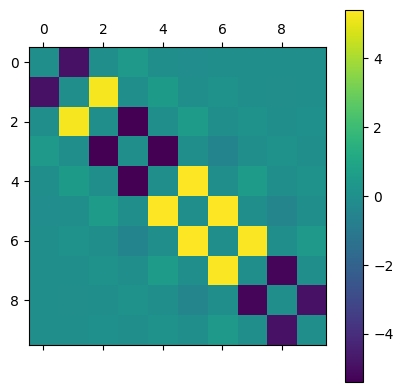

In [4]:
import matplotlib.pyplot as plt
plt.matshow(flake.dipole_operator_e[0].real)
plt.colorbar()
plt.show()